# In-Class Quiz Nº 3

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Rodrigo Dias
## Number: 45881

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q2.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: MNIST dataset (small version) - pickle file $\texttt{kMNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($10000\times(28\times28)$  uint8 array)
* ### y1: classes of the training data (10 japanese characters, class-numbers 0 to 9)
* ### X2: test data ($5000\times(28\times28)$ uint8 array)
* ### y2: classes of the test data (10 japanese characters, class-numbers 0 to 9)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve

import pickle

# load data
D = pickle.load(open('kMNISTsmall.p', 'rb'))
X1 = D.X1*1.
X2 = D.X2*1.
y1 = D.y1
y2 = D.y2

print(X1.shape, X2.shape, y1.shape, y2.shape)


(10000, 28, 28) (5000, 28, 28) (10000,) (5000,)


# Question 1: 
##  Consider an MLP network with the following architecture: 
##  - an input layer able to deal with the kMNIST images.
##  - 3 hidden layers with 50 units each and with $\texttt{ReLu}$ activations.
##  - an output layer with 10 units and a softmax activation function
### a) Build this network, and compile it with the loss and the optimizer of your choice. Make sure not to include any extra layers (e.g. Dropout). Print the total number of parameters of the MLP.
### b) Train the network for 100 epochs with a batch-size of 5000. Use the kMNIST training set. For this purpose use the raw data (make sure not to perform any scaling or transformation of the  data). Also include the test data as the validation set during training.
### c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets during the training process.  Comment the results.
### d) Print the total number of errors and the confusion matrix for the test dataset.

## 1.a)

In [2]:
nn = keras.Sequential()
nn.add(keras.layers.Flatten(input_shape=(28, 28)))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dense(10, activation="softmax"))

nn.compile(optimizer="nadam",
           loss="categorical_crossentropy",
           metrics=["accuracy"])

print(nn.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________
None


## 1.b)

In [3]:
y1B = keras.utils.to_categorical(y1)
y2B = keras.utils.to_categorical(y2)

print(y1B.shape, y2B.shape)

train = nn.fit(X1, y1B, epochs=100, batch_size=5000, validation_data=(X2, y2B))


(10000, 10) (5000, 10)
Epoch 1/100
2/2 [==============================] - 0s 131ms/step - loss: 66.7890 - accuracy: 0.1048 - val_loss: 46.6524 - val_accuracy: 0.1014
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 39.5890 - accuracy: 0.1315 - val_loss: 34.7530 - val_accuracy: 0.1292
Epoch 3/100
2/2 [==============================] - 0s 36ms/step - loss: 28.8297 - accuracy: 0.1742 - val_loss: 26.8202 - val_accuracy: 0.1666
Epoch 4/100
2/2 [==============================] - 0s 36ms/step - loss: 21.8414 - accuracy: 0.2232 - val_loss: 21.5880 - val_accuracy: 0.1960
Epoch 5/100
2/2 [==============================] - 0s 42ms/step - loss: 16.9967 - accuracy: 0.2740 - val_loss: 17.9153 - val_accuracy: 0.2274
Epoch 6/100
2/2 [==============================] - 0s 56ms/step - loss: 13.6497 - accuracy: 0.3182 - val_loss: 15.2365 - val_accuracy: 0.2528
Epoch 7/100
2/2 [==============================] - 0s 47ms/step - loss: 11.2127 - accuracy: 0.3593 - val_loss: 13.2421 - val

## 1.c)

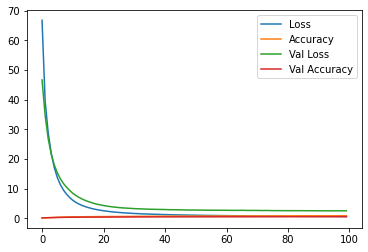

In [4]:
h = train.history
plt.plot(h["loss"], label='Loss')
plt.plot(h["accuracy"], label='Accuracy')
plt.plot(h["val_loss"], label='Val Loss')
plt.plot(h["val_accuracy"], label='Val Accuracy')
# plt.axis([0, 100, 0, 1])
plt.legend()
plt.show()

# Observa-se que a loos e val_loss estão a diminuir ao longo do tempo. Ao limitar os eixos entre 0 e 1 vê-se também que a accuracy e val_accuracy estão a aumentar.
# Os parâmetros de validação acabam por não ser tão bons como os de treino porque são dados diferentes e estão a servir para validar o desempenho do treino.
# Por isso é possível ver que a accuracy chega ao valor de 1 enquanto a val_accuracy chega ao valor de 0.6 apenas


## 1.d)

In [5]:
yPred = nn.predict(X2)
y2Pred = np.argmax(yPred, axis=1)

print('Total number of errors:', np.sum(y2Pred != y2))
print(confusion_matrix(y2, y2Pred))

nn.evaluate(X2, y2B)


Total number of errors: 2400
[[277   7  12   8  86  43   6  11  27  23]
 [  2 279  34   8  26  17  51  13  41  29]
 [  8  47 235  14  38  20  40  32  38  28]
 [ 15  20  34 234  27  18  27  42  71  12]
 [ 28  35  19  20 262  10  35  40  14  37]
 [ 13  37  50  20  22 294  24  10  25   5]
 [  3  26  37   3  51   9 303  41  20   7]
 [  9  12  15  26 101   6  41 208  43  39]
 [  9  59  44  14  17  28  27  26 257  19]
 [ 23  39  33   9  60  12  26  21  26 251]]
157/157 [==============================] - 0s 2ms/step - loss: 2.5037 - accuracy: 0.5200


[2.50374436378479, 0.5199999809265137]

<hr style="border:2px solid black"> </hr>

# Question 2
## Consider a MLP network with the same architecture of the MLP from the previous question. The only difference being the input layer.
### a) Pre-process the data using the function  $\texttt{PCA(withen=True)}$. Train this function with the training data and apply the transformation to the training and test sets. Preseve only the first 250 principal componentes of the data. Use the pre-processed data in the following items.
### b)  Build this network, and compile it with the loss and the optimizer used in the previous question.  Train the network for 100 epochs with a batch-size of 5000. Use the kMNIST training set and include the test data as the validation set during training.
### c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets during the training process.  Comment the results. Also print the total number of errors and the confusion matrix for the test dataset.

## 2.a)

In [6]:
from sklearn.decomposition import PCA

print(X1.shape)
X1r = X1.reshape(X1.shape[0], X1.shape[1]*X1.shape[2])
X2r = X2.reshape(X2.shape[0], X2.shape[1]*X2.shape[2])

pca = PCA(n_components=250, whiten=True).fit(X1r, y1B)
X1p = pca.transform(X1r)
X2p = pca.transform(X2r)

print(X1p.shape, X2p.shape)


(10000, 28, 28)
(10000, 250) (5000, 250)


## 2.b)

In [7]:
nn = keras.Sequential()
nn.add(keras.layers.Flatten(input_shape=(250,)))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dense(50, activation="relu"))
nn.add(keras.layers.Dense(10, activation="softmax"))

nn.compile(optimizer="nadam",
           loss="categorical_crossentropy",
           metrics=["accuracy"])

print(nn.summary())

train = nn.fit(X1p, y1B, epochs=100, batch_size=5000,
               validation_data=(X2p, y2B))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                12550     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 18,160
Trainable params: 18,160
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
2/2 [==============================] - 0s 95ms/step - loss: 2.4263 - accuracy: 0.0917 - val_loss: 2

## 2.c)

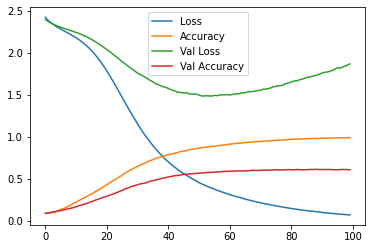

Total number of errors: 1937
[[339  15  10   5  27  18   1  26  30  29]
 [  3 311  24  26  19   8  48   5  31  25]
 [  6  39 265  21  24  16  36  18  39  36]
 [  7  32  27 334  11  15  24  19  24   7]
 [ 20  35  32  20 281  12  36  15  18  31]
 [  4  16  67  11  12 321  33   9  11  16]
 [  2  30  49  21  34  13 326   6  16   3]
 [ 25  14  17  17  58  21  36 259  18  35]
 [ 11  30  58  19  11   9  17   6 320  19]
 [ 16  36  32   4  30  13  15  17  30 307]]
157/157 [==============================] - 0s 1ms/step - loss: 1.8712 - accuracy: 0.6126


[1.8712387084960938, 0.6126000285148621]

In [8]:
h = train.history
plt.plot(h["loss"], label='Loss')
plt.plot(h["accuracy"], label='Accuracy')
plt.plot(h["val_loss"], label='Val Loss')
plt.plot(h["val_accuracy"], label='Val Accuracy')
# plt.axis([0, 100, 0, 1])
plt.legend()
plt.show()

yPred = nn.predict(X2p)
y2Pred = np.argmax(yPred, axis=1)

print('Total number of errors:', np.sum(y2Pred != y2))
print(confusion_matrix(y2, y2Pred))

nn.evaluate(X2p, y2B)

# É possível observar que a val_loss neste caso começa a subir a partir dos 50 epochs. Isto poderá querer dizer que a rede está a memorizar e não a aprender, pois quando lhe são aprensetados novos dados, o desempenho é pior.
# Observa-se o mesmo comportamento para a accuracy e val_accuracy que o exercício anterior.


<hr style="border:2px solid black"> </hr>

# Question 3
## Consider a MLP network an architecture of your choice, using any type of layers, activation functions or other parameters  that might imporve the results. You can also perform any type of pre-processing of the $\texttt{kMNISTsmall}$ data if it helps improve performance. Train and test this new network. Make sure the test results are better than in the previous 2 questions.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               50200     
_________________________________________________________________
dense_9 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2010      
Total params: 132,610
Trainable params: 132,610
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
10/10 [==============================] - 0s 25ms/step - loss: 2.2428 - accuracy: 0.1841 - val_los

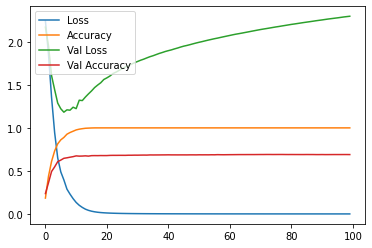

Total number of errors: 1551
[[364   2   9   3  25  16   1  29  38  13]
 [  1 367  22   8  15   7  39   5  19  17]
 [  2  24 292  24  28  10  35  18  40  27]
 [  4  11  30 392   7  12  16   6  19   3]
 [ 31  24  25  18 314   6  24  17  14  27]
 [  2  21  55  11  11 339  21   7  25   8]
 [  2  17  46  10  17   3 378  12  10   5]
 [ 11   9  16  10  48   8  26 301  40  31]
 [  8  24  28  22   6  14  22   9 356  11]
 [ 11  27  31   2  30   9  11  16  17 346]]
157/157 [==============================] - 0s 2ms/step - loss: 2.2972 - accuracy: 0.6898


[2.297239303588867, 0.6898000240325928]

In [9]:
nn = keras.Sequential()
nn.add(keras.layers.Flatten(input_shape=(250,)))
nn.add(keras.layers.Dense(200, activation="relu"))
nn.add(keras.layers.Dense(200, activation="relu"))
nn.add(keras.layers.Dense(200, activation="relu"))
nn.add(keras.layers.Dense(10, activation="softmax"))

nn.compile(optimizer="nadam",
           loss="categorical_crossentropy",
           metrics=["accuracy"])

print(nn.summary())

train = nn.fit(X1p, y1B, epochs=100, batch_size=1024,
               validation_data=(X2p, y2B))

h = train.history
plt.plot(h["loss"], label='Loss')
plt.plot(h["accuracy"], label='Accuracy')
plt.plot(h["val_loss"], label='Val Loss')
plt.plot(h["val_accuracy"], label='Val Accuracy')
# plt.axis([0, 100, 0, 1])
plt.legend()
plt.show()

yPred = nn.predict(X2p)
y2Pred = np.argmax(yPred, axis=1)

print('Total number of errors:', np.sum(y2Pred != y2))
print(confusion_matrix(y2, y2Pred))

nn.evaluate(X2p, y2B)
